In [1]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
os.getcwd()

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


'C:\\Users\\Tim\\Documents\\machine_learning_class\\Contest1\\scikit_learn'

In [3]:
dataframe = pd.read_csv('../train.csv', delimiter=',')
print(dataframe.shape)

dataset = dataframe.values

y = dataset[:,0]
x = dataset[:,1:len(dataframe.columns)].astype(float)

(178, 1201)


In [4]:
def img_converter(x):
    obs = len(x)
    r = x[:, 0:1198:3]
    g = x[:, 1:1199:3]
    b = x[:, 2:1200:3]
    r = r[:,:].reshape(obs, 20, 20)
    g = g[:,:].reshape(obs, 20, 20)
    b = b[:,:].reshape(obs, 20, 20)
    rgb = np.stack((r, g, b), axis=3)
    return rgb

x = img_converter(x)
x.shape

(178, 20, 20, 3)

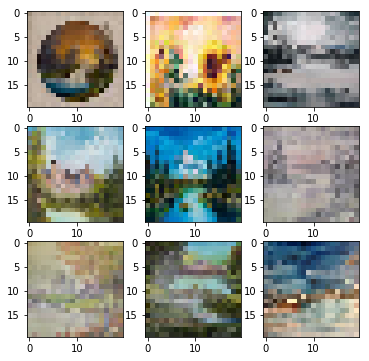

In [83]:
# Want to show the complicated pictures for some ideas
# Flowers
def pic_grid(x): 
    plt.figure(figsize=(6, 6))
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(x[i])
    plt.show()
    return

pic_grid(x)

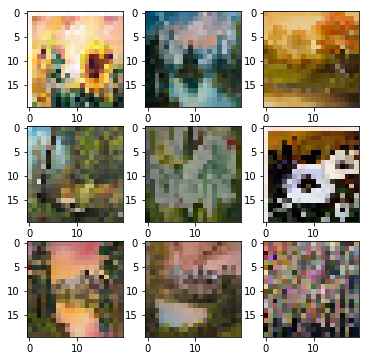

In [82]:
def indexer(y, painting):
    y_s = pd.Series(y)
    y_flower = y_s[y_s == painting]
    return np.array(y_flower.index)

pic_grid(x[indexer(y, 'flowers')])

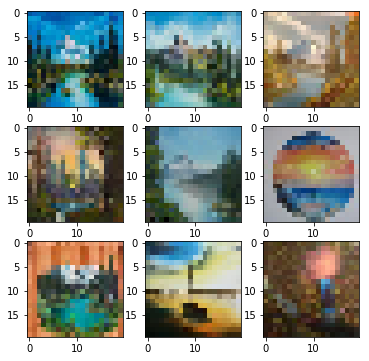

In [42]:
pic_grid(x[indexer(y, 'water')])

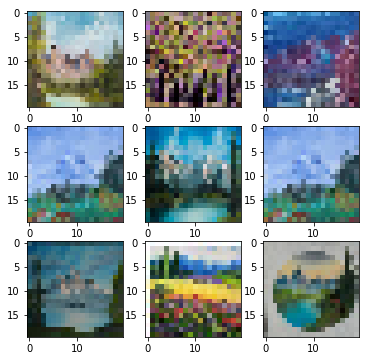

In [43]:
pic_grid(x[indexer(y, 'scene')])

In [62]:
def pic_batch(x, center, norm):
    datagen = ImageDataGenerator(
        featurewise_center=center, 
        featurewise_std_normalization=norm)

    datagen.fit(x)
    for x_batch, y_batch in datagen.flow(x, y, batch_size=3, shuffle=False):
        break
    
    return x_batch

x_raw = pic_batch(x, False, False)
x_center = pic_batch(x, True, False)
x_norm = pic_batch(x, True, True)

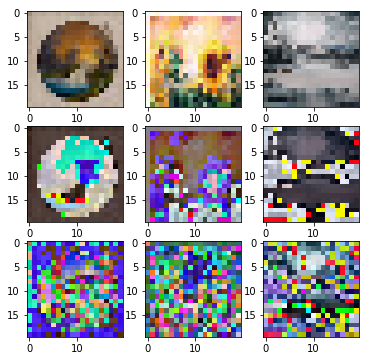

In [71]:
xs = np.vstack([x_raw, x_center, x_norm])
pic_grid(xs)